# Optimisez la gestion des données d'une boutique avec R ou Python

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Fichier ERP 

In [2]:
#Import du fichier csv erp 

erp = pd.read_csv("erp.csv")
erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [3]:
#Regarder la composition du df erp

erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


On voit qu'il n'y aucune valeurs manquantes

In [4]:
#Voir si les références sont uniques, le nombre de valeurs uniques pour chaque ligne.

erp.nunique()

product_id        825
onsale_web          2
price             381
stock_quantity    128
stock_status        2
dtype: int64

On voit que les références sont uniques

In [5]:
#Recherche données dupliquées

erp.duplicated().sum()

0

On voit qu'il n'y pas de données dupliquées

In [6]:
#Regarder s'il y a des valeurs nulles

erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

On voit qu'il n'y pas de valeurs nulles

In [7]:
#Recherche s'il y a des NaN

erp.isna().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

On voit qu'il n'y pas de NaN

In [8]:
#Connaitre le nombre de instock et outstock

erp['stock_status'].value_counts()

instock       638
outofstock    187
Name: stock_status, dtype: int64

In [9]:
#Connaitre le nombre de produit à vendre 
#On peut supposer que 1 est un produit à vendre et 0 est un produit qui n'est plus à vendre, qui n'est pas en stock

erp['onsale_web'].value_counts()

1    717
0    108
Name: onsale_web, dtype: int64

### Fichier Web

In [10]:
#Import du fichier csv web

web = pd.read_csv("web.csv")
web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [11]:
#Composition du df web

web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

In [12]:
# Voir la présence de valeur unique ou non 

web.nunique()

sku                       714
virtual                     1
downloadable                1
rating_count                1
average_rating              1
total_sales                41
tax_status                  1
tax_class                   0
post_author                 2
post_date                 716
post_date_gmt             716
post_content                0
post_title                713
post_excerpt              679
post_status                 1
comment_status              1
ping_status                 1
post_password               0
post_name                 716
post_modified             589
post_modified_gmt         589
post_content_filtered       0
post_parent                 1
guid                     1430
menu_order                  1
post_type                   2
post_mime_type              1
comment_count               1
dtype: int64

On voit qu'il y a certaines références qui sont uniques mais toutes ne le sont pas.

In [13]:
#Identifier s'il y a des valeurs nulles

web.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

On voit qu'il y des valeurs nulles mais je ne les supprime pas pour le moment pour ne pas supprimer des données qui pourraient être importante.

In [14]:
#nombre total de valeurs nulles

web.isnull().sum().sum()

9941

In [15]:
#Recherche données dupliquées

web.duplicated().sum()

82

In [16]:
duplicate = web[web.duplicated()]
duplicate

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Suppression données dupliquées

web = web.drop_duplicates()
web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [18]:
#On verifie que les données dupliquées ont bien était supprimées 

web.duplicated().sum()

0

In [19]:
#Recherche de NaN

web.isna().sum()

sku                         3
virtual                     0
downloadable                0
rating_count                0
average_rating              1
total_sales                 1
tax_status                715
tax_class                1431
post_author                 1
post_date                   1
post_date_gmt               1
post_content             1431
post_title                  1
post_excerpt              715
post_status                 1
comment_status              1
ping_status                 1
post_password            1431
post_name                   1
post_modified               1
post_modified_gmt           1
post_content_filtered    1431
post_parent                 1
guid                        1
menu_order                  1
post_type                   1
post_mime_type            717
comment_count               1
dtype: int64

In [20]:
# Remplacement des NaN
# On remplace les NaN par 0 pour ne pas supprimer des données qui pourraient être importante

web.fillna(0, inplace=True)
web.head()

C:\Users\Juliette\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,0.0,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
1,15298,0,0,0,0.0,6.0,taxable,0.0,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
2,15296,0,0,0,0.0,0.0,taxable,0.0,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
3,15300,0,0,0,0.0,0.0,taxable,0.0,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
4,19814,0,0,0,0.0,3.0,taxable,0.0,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0


In [21]:
# Nom de la colonne sku remplacée par id_web pour garder la continuité avec le df liaison
# J'ai remarqué que les données étaient les mêmes avec le df liaison

web = web.rename(columns={'sku': 'id_web'})
web

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,0.0,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
1,15298,0,0,0,0.0,6.0,taxable,0.0,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
2,15296,0,0,0,0.0,0.0,taxable,0.0,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
3,15300,0,0,0,0.0,0.0,taxable,0.0,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
4,19814,0,0,0,0.0,3.0,taxable,0.0,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,0,0.0,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,0,0.0,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,0,0.0,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,0,0.0,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


#### Recherche et test des colonnes qui semblent égales à zéro en totalité

In [22]:
web['id_web'].value_counts()

0        3
14800    2
13453    2
15404    2
16565    2
        ..
16537    2
12869    2
3568     2
15229    2
16119    2
Name: id_web, Length: 715, dtype: int64

In [23]:
web['virtual'].value_counts()

0    1431
Name: virtual, dtype: int64

In [24]:
web['downloadable'].value_counts()

0    1431
Name: downloadable, dtype: int64

In [25]:
web['rating_count'].value_counts()

0    1431
Name: rating_count, dtype: int64

In [26]:
web['average_rating'].value_counts()

0.0    1431
Name: average_rating, dtype: int64

In [27]:
web['total_sales'].value_counts()

0.0     661
1.0     174
3.0     104
2.0      80
4.0      60
6.0      50
5.0      44
7.0      38
12.0     30
10.0     20
9.0      20
8.0      20
18.0     14
11.0     14
13.0     12
19.0     10
14.0      8
15.0      8
36.0      4
20.0      4
23.0      4
30.0      4
17.0      4
24.0      4
22.0      4
38.0      4
16.0      4
43.0      2
32.0      2
41.0      2
37.0      2
96.0      2
42.0      2
29.0      2
21.0      2
46.0      2
26.0      2
87.0      2
33.0      2
40.0      2
62.0      2
Name: total_sales, dtype: int64

In [28]:
web['tax_status'].value_counts()

taxable    716
0          715
Name: tax_status, dtype: int64

In [29]:
web['tax_class'].value_counts()

0.0    1431
Name: tax_class, dtype: int64

In [30]:
web['post_date'].value_counts()

2018-02-16 09:55:50    2
2018-04-19 13:41:51    2
2020-02-22 14:03:10    2
2019-10-05 10:46:15    2
2019-03-19 11:29:23    2
                      ..
2019-03-28 15:25:14    2
2020-04-25 13:22:38    2
2018-08-08 11:23:43    1
2018-07-31 12:07:23    1
0                      1
Name: post_date, Length: 717, dtype: int64

In [31]:
web['post_author'].value_counts()

2.0    1428
1.0       2
0.0       1
Name: post_author, dtype: int64

In [32]:
web['post_name'].value_counts()

clos-du-mont-olivet-cotes-du-rhone-rose-farel-2019                     2
chermette-domaine-du-vissoux-beaujolais-griottes-2018                  2
chateau-la-tour-laspic-pauillac-2014                                   2
marc-colin-et-fils-chassagne-montrachet-blanc-1cru-champs-gain-2017    2
domaine-schoenheitz-pinot-noir-tradition-2019                          2
                                                                      ..
bon-cadeau-de-25-euros                                                 2
pierre-gaillard-condrieu-2018                                          2
pierre-jean-villa-cote-rotie-fongeant-2017                             1
pierre-jean-villa-condrieu-suspendu-2018                               1
0                                                                      1
Name: post_name, Length: 717, dtype: int64

In [33]:
web['post_title'].value_counts()

Marc Colin Et Fils Chassagne-Montrachet Blanc Les Vide-Bourses 1er Cru 2016    4
Clos du Mont-Olivet Châteauneuf-du-Pape 2007                                   4
Domaine Hauvette IGP Alpilles Jaspe 2017                                       4
Château de Villeneuve Saumur-Champigny 2017                                    2
Parcé Frères Banyuls Rimage 2018                                               2
                                                                              ..
Marc Colin Et Fils Chassagne-Montrachet Rouge Vieilles Vignes 2017             2
Domaine Huet Vouvray Le Mont Moelleux 2015                                     2
Pierre Jean Villa Condrieu Jardin Suspendu 2018                                1
Pierre Jean Villa Côte Rôtie Fongeant 2017                                     1
0                                                                              1
Name: post_title, Length: 714, dtype: int64

In [34]:
web['post_mime_type'].value_counts()

0             717
image/jpeg    714
Name: post_mime_type, dtype: int64

In [35]:
web['post_content'].value_counts()

0.0    1431
Name: post_content, dtype: int64

In [36]:
web['post_content_filtered'].value_counts()

0.0    1431
Name: post_content_filtered, dtype: int64

In [37]:
web['post_password'].value_counts()

0.0    1431
Name: post_password, dtype: int64

In [38]:
web['post_parent'].value_counts()

0.0    1431
Name: post_parent, dtype: int64

In [39]:
web['menu_order'].value_counts()

0.0    1431
Name: menu_order, dtype: int64

In [40]:
web['comment_count'].value_counts()

0.0    1431
Name: comment_count, dtype: int64

In [41]:
#on verifie les types de produits
web["post_type"].unique()

array(['product', 0, 'attachment'], dtype=object)

In [42]:
#On regarde ce que peuvent être les lignes attachment
web.loc[web['post_type'] == "attachment"]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,0,0.0,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,0,0.0,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,0,0.0,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,0,0.0,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,0,0.0,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,0,0.0,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,0,0.0,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,0,0.0,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,0,0.0,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [43]:
# les lignes attachment sont à mettre en corrélation avec les types mimes jpeg : des images et non des produits
web.drop( web[ web['post_type'] == "attachment" ].index, inplace=True)
web

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,0.0,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
1,15298,0,0,0,0.0,6.0,taxable,0.0,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
2,15296,0,0,0,0.0,0.0,taxable,0.0,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
3,15300,0,0,0,0.0,0.0,taxable,0.0,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
4,19814,0,0,0,0.0,3.0,taxable,0.0,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,0.0,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
767,15891,0,0,0,0.0,0.0,taxable,0.0,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
768,15887,0,0,0,0.0,0.0,taxable,0.0,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,0.0,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0


In [44]:
#On a désormais uniquement des produits mais il reste une ligne à 0
web["post_type"].unique()

array(['product', 0], dtype=object)

In [45]:
#On étudie la ligne à 0
web.loc[web['post_type'] == 0]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,0,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0,0,0,0.0,0.0,0,0.0,0,0,0.0


In [46]:
#La ligne a 0 ne semble renfermer aucune données importante, on la supprime
web.drop( web[ web['post_type'] == 0].index, inplace=True)
web["post_type"].unique()

array(['product'], dtype=object)

In [47]:
# Suppression des colonnes inutiles , toutes égales à 0, on le fait d'un seul coup

web.drop(columns=['average_rating','tax_class','downloadable', 'virtual','rating_count', 'post_content','post_content_filtered','post_parent','menu_order', 'comment_count'])

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
0,bon-cadeau-25-euros,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,0.0,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,0
1,15298,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,0.0,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,0
2,15296,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,0.0,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,0
3,15300,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,0
4,19814,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,0.0,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,5.0,taxable,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,closed,closed,0.0,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product,0
767,15891,0.0,taxable,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,closed,closed,0.0,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,0
768,15887,0.0,taxable,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,closed,closed,0.0,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,0
797,13127-1,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,closed,closed,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product,0


### Fichier Liaison

In [48]:
#Import du fichier csv liaison

liaison = pd.read_csv("liaison.csv")
liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [49]:
#Composition du df liaison

liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


On devra faire attention à certains product_id puisqu'ils n'ont pas de correspondance dans id_web.

In [50]:
# Voir si les valeurs sont uniques

liaison.nunique()

product_id    825
id_web        734
dtype: int64

In [51]:
#Recherche des données dupliquées

liaison.duplicated().sum()

0

In [52]:
#Nombre total de valeurs nulles 

liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

In [53]:
#Aperçu des valeurs nulles dans la colonne id_web

liaison.id_web.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
820     True
821     True
822    False
823    False
824    False
Name: id_web, Length: 825, dtype: bool

In [54]:
# Remplacement des NaN

liaison.fillna(0, inplace=True)
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [55]:
liaison['product_id'].value_counts()

4096    1
5391    1
6222    1
6301    1
5375    1
       ..
4672    1
4673    1
4674    1
4675    1
4095    1
Name: product_id, Length: 825, dtype: int64

In [56]:
liaison['id_web'].value_counts()

0        91
16191     1
12790     1
15436     1
14429     1
         ..
15574     1
16537     1
13771     1
3568      1
15264     1
Name: id_web, Length: 735, dtype: int64

Les 91 0, Il s'agit de ref non dispo sur le site web, ce sont les 0 de la colonne onsale du df erp

In [57]:
liaison.drop(liaison[liaison ['id_web'] == 0].index, inplace=True)
liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


In [58]:
liaison['id_web'].value_counts()

14800    1
15530    1
15404    1
12790    1
15436    1
        ..
13736    1
15574    1
16537    1
13771    1
15264    1
Name: id_web, Length: 734, dtype: int64

## Calcul du chiffre d'affaire

In [59]:
# Rappel du df erp 
erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [60]:
# Jointure entre liaison et erp en utilisant la colonne 'product_id' présente dans les deux df 

merge1 = pd.merge (erp, liaison, on= "product_id" )
merge1


,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
729,7023,1,27.5,15,instock,15891
730,7025,1,69.0,2,instock,15887
731,7247,1,54.8,23,instock,13127-1
732,7329,0,26.5,14,instock,14680-1


On prends product_Id en clé puisque dans les deux df ont à le même nombre de références uniques.

In [61]:
# On effectue un deuxième merge avec Web pour y mettre la signification des produits 
merge2 = pd.merge(merge1, web, on = "id_web")
merge2

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
1,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
2,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
3,4032,1,14.1,0,outofstock,19814,0,0,0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
4,4039,1,46.0,0,outofstock,19815,0,0,0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,1,8.4,83,instock,16135,0,0,0,0.0,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
710,7023,1,27.5,15,instock,15891,0,0,0,0.0,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
711,7025,1,69.0,2,instock,15887,0,0,0,0.0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
712,7247,1,54.8,23,instock,13127-1,0,0,0,0.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0


on utilise id_web en clé, il faut faire attention aux références non vendues sur le site.

In [62]:
#On verifie qu'il n'y a pas doublons qui sont apparus
merge2.duplicated().sum()

0

In [63]:
merge2 = merge2[["product_id", "price", "total_sales", "post_title", "post_name", "post_type"]]
merge2

,product_id,price,total_sales,post_title,post_name,post_type
0,3847,24.2,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,product
1,3849,34.3,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,product
2,3850,20.8,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,pierre-jean-villa-croze-hermitage-accroche-coe...,product
3,4032,14.1,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,product
4,4039,46.0,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,pierre-jean-villa-cote-rotie-carmina-2017,product
...,...,...,...,...,...,...
709,6930,8.4,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,mouthes-le-bihan-aime-chai-2015,product
710,7023,27.5,0.0,Camin Larredya Jurançon Sec La Virada 2018,camin-larredya-jurancon-sec-la-virada-2018,product
711,7025,69.0,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,jamet-cote-rotie-fructus-voluptas-2018,product
712,7247,54.8,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,product


In [64]:
# Creation d'une colonne contenant le chiffre d'affaire par produits:

merge2["ca_product"] = merge2["price"]*merge2["total_sales"]

print(merge2.groupby("post_title")[["ca_product"]].prod())

                                                    ca_product
post_title                                                    
Agnès Levet Côte Rôtie Améthyste 2017                    164.8
Agnès Levet Côte Rôtie Maestria 2017                     165.0
Agnès Levet Côte Rôtie Péroline 2017                     171.0
Alain Graillot Crozes-Hermitage Blanc 2018               244.0
Alain Graillot Crozes-Hermitage Rouge 2017               146.4
...                                                        ...
Zind-Humbrecht Pinot Gris Roche Calcaire 2017              0.0
Zind-Humbrecht Riesling Clos Windsbuhl 2014                0.0
Zind-Humbrecht Riesling Grand Cru Rangen De Tha...         0.0
Zind-Humbrecht Riesling Herrenweg de Turckheim ...        63.4
Zind-Humbrecht Zind 2017                                 154.2

[711 rows x 1 columns]


<ipython-input-64-e0c37bc7b0fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge2["ca_product"] = merge2["price"]*merge2["total_sales"]


In [65]:
# Aperçu de la nouvelle colonne , affichage du df
merge2

,product_id,price,total_sales,post_title,post_name,post_type,ca_product
0,3847,24.2,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,product,145.2
1,3849,34.3,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,product,0.0
2,3850,20.8,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,pierre-jean-villa-croze-hermitage-accroche-coe...,product,0.0
3,4032,14.1,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,product,42.3
4,4039,46.0,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,pierre-jean-villa-cote-rotie-carmina-2017,product,0.0
...,...,...,...,...,...,...,...
709,6930,8.4,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,mouthes-le-bihan-aime-chai-2015,product,42.0
710,7023,27.5,0.0,Camin Larredya Jurançon Sec La Virada 2018,camin-larredya-jurancon-sec-la-virada-2018,product,0.0
711,7025,69.0,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,jamet-cote-rotie-fructus-voluptas-2018,product,0.0
712,7247,54.8,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,product,0.0


In [66]:
# Calcul du chiffre d'affaire total

merge2.ca_product.sum()
print("Le chiffre d'affaire total est de", merge2.ca_product.sum(), "€")

Le chiffre d'affaire total est de 70568.6 €


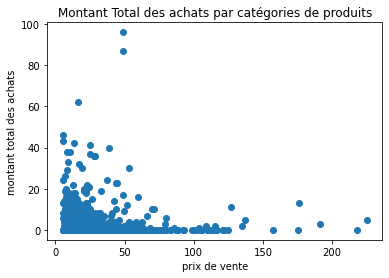

In [67]:
#Visualisation de la variable 'price' et 'total_sales' en nuage de points

plt.plot(merge2 ['price'],merge2 ['total_sales'],'o')
plt.xlabel("prix de vente")
plt.ylabel("montant total des achats")
plt.title('Montant Total des achats par catégories de produits')
plt.show()

On s'apercoit que la majorité des points du nuage se situe au début, la majorité des achats situent pour des bouteilles ayant des prix allant jusque 50€. 
On retrouve aussi nos prix de vente à plus de 200€ mais qui representent des exceptions d'achats.

In [68]:
# Aperçu de la répartition des données

merge2.price.describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

La méthode .describe nous donne un résumé statistique basique de la colonne price de notre dataframe.

Il y a 714 données 

La moyenne est à 32,49 €. On note qu'elle est différente de la médiane.

Nous avons aussi les premier et troisème percentiles ainsi que la médiane (second percentil, 50%) à 23,55€.

L'ecart type est de 27,81€

Le prix minimum est à 5,20 € et le prix maximum est à 225€ , on s'aperçoit qu'il y a une large répartition des prix .

On le verifie de manière plus graphique ensuite

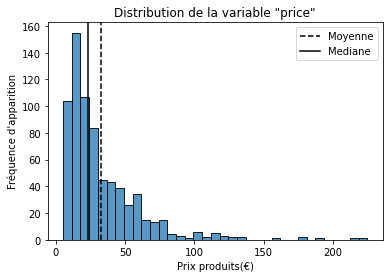

In [69]:
# Definition de moyenne et medianne pour les utiliser dans l'histogramme
# moyenne = somme des valeurs divisée par leur nombre 
# médiane = autant de valeur au-dessus qu'en-dessous
mean = merge2["price"].mean()
median = merge2["price"].median()

#Visualisation (Histogramme)de la distribution des prix produits

sns.histplot(data=merge2["price"])

plt.axvline(mean, color="black", linestyle="--")
plt.axvline(median, color="black", linestyle="-")
plt.legend({"Moyenne":mean,"Mediane":median})
plt.title('Distribution de la variable "price"')
plt.xlabel('Prix produits(€)')
plt.ylabel('Fréquence d\'apparition')
plt.show()

On remarque que la majorité des données se situent en début d'histogramme et il est intéressant de faire apparaître la moyenne et la médiane pour connaitre leurs situations dans le graphique.

On s'aperçoit que la majorité des prix des produits se situent entre 10 et 50€ mais que le prix maximum va au delà de 200€, il y a une moyenne au alentour de 30/35€ et une mediane au alentour de 20€/25€.

Les premiers prix sont donc les plus frequents comparé au prix élévés dans notre boutique.

Ces résultats sont precisé avec le describe suivant


In [70]:
# Detection numerique des outliers:
Q1 = merge2["price"].quantile(q=0.25, interpolation="midpoint")
Q3 = merge2["price"].quantile(q=0.75, interpolation="midpoint")
Iq = Q3 - Q1

Lim_Outliers_Inf = Q1-1.5*Iq
Lim_Outliers_Sup = Q3+1.5*Iq

Outliers_Inf = merge2["price"] < Lim_Outliers_Inf
Outliers_Sup = merge2["price"] > Lim_Outliers_Sup


print("Limite pour les outliers inferieurs:\n", round(Lim_Outliers_Inf,2))
print("Les index des outliers inferieurs sont:\n", np.where(Outliers_Inf)[0])

print("Limite pour les outliers superieurs:\n", round(Lim_Outliers_Sup,2))
print("Les index des outliers superieurs sont:\n", np.where(Outliers_Sup)[0])
print("\n",merge2.loc[(merge2["price"]>84.05),("price","post_title")])

Limite pour les outliers inferieurs:
 -27.98
Les index des outliers inferieurs sont:
 []
Limite pour les outliers superieurs:
 84.22
Les index des outliers superieurs sont:
 [ 63  65 199 201 205 218 219 221 222 227 380 381 426 431 432 437 438 502
 511 553 587 602 603 604 642 647 648 653 654 655 656 657]

      price                                         post_title
63   100.0  Zind-Humbrecht Riesling Grand Cru Rangen De Th...
65    88.4  Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...
199  225.0     Champagne Egly-Ouriet Grand Cru Millésimé 2008
201  126.5     Champagne Egly-Ouriet Grand Cru Blanc de Noirs
205   85.6  Champagne Larmandier-Bernier Grand Cru Les Che...
218  176.0                               Cognac Frapin VIP XO
219  108.5              Cognac Frapin Château de Fontpinot XO
221  157.0  Cognac Frapin Château de Fontpinot 1989 20 Ans...
222  104.0                          Cognac Frapin Cigar Blend
227  109.6  Château de Meursault Puligny-Montrachet 1er Cr...
380  102.3 

In [71]:
# La fonction len() renvoie le nombre d'élément
len(np.where(Outliers_Sup)[0])

32

Il y est normal qu'il n'y ait pas d'index des outliers inferieurs puisque les prix ne peuvent pas être négatifs, et notre prix mini est de 5,20€ et la limite inférieure est négative.

La valeur maximale est de 225€, la limite supérieure est de 84,22€, il est logique qu'il y aura au moins un outlieur supérieur, on retourne les index pour lesquels l'affirmation est juste. Il y a 32 références au total.

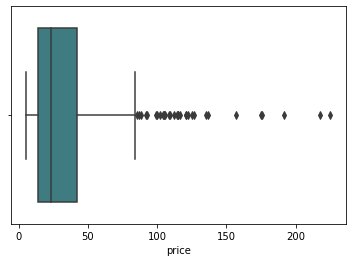

In [72]:
# Representation graphique en boxplot:

Boxplot = sns.boxplot(x= merge2["price"],palette="crest")

La ligne noire represente la mediane , les losanges noirs sont les valeurs dites aberrantes, ce sont peut être des bouteilles d'exceptions dont les prix sont élevés. Ce sont les valeurs dites outliers. 

In [73]:
# Liste des bouteilles les plus chères, 
# aperçu des valeurs dites aberrantes qui ne sont en réalité que des bouteilles d'exceptions tel que des millesimes. 

merge2.groupby('post_title')['price'].sum().nlargest(10)

post_title
Champagne Egly-Ouriet Grand Cru Millésimé 2008                       225.0
David Duband Charmes-Chambertin Grand Cru 2014                       217.5
Coteaux Champenois Egly-Ouriet Ambonnay Rouge 2016                   191.3
Cognac Frapin VIP XO                                                 176.0
Camille Giroud Clos de Vougeot 2016                                  175.0
Cognac Frapin Château de Fontpinot 1989 20 Ans d'Age                 157.0
Domaine Des Croix Corton Charlemagne Grand Cru 2016                  137.0
Champagne Gosset Célébris Vintage 2007                               135.0
Champagne Egly-Ouriet Grand Cru Blanc de Noirs                       126.5
Domaine Weinbach Gewurztraminer Grand Cru Furstentum SGN 2010 1/2    124.8
Name: price, dtype: float64